In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Налаштування стилю та розміру графіків
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('../data/raw/tz_opendata_z01012022_po01032022.csv', sep=';')

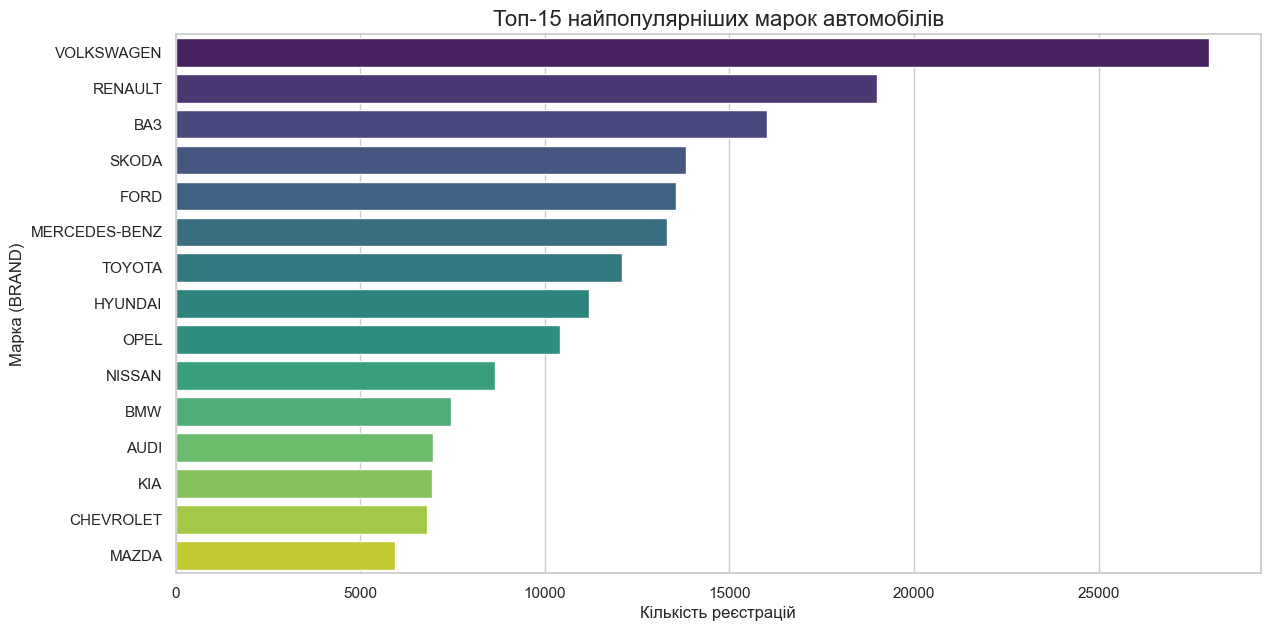

In [3]:
top_brands = df['BRAND'].value_counts().head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title('Топ-15 найпопулярніших марок автомобілів', fontsize=16)
plt.xlabel('Кількість реєстрацій', fontsize=12)
plt.ylabel('Марка (BRAND)', fontsize=12)
plt.show()

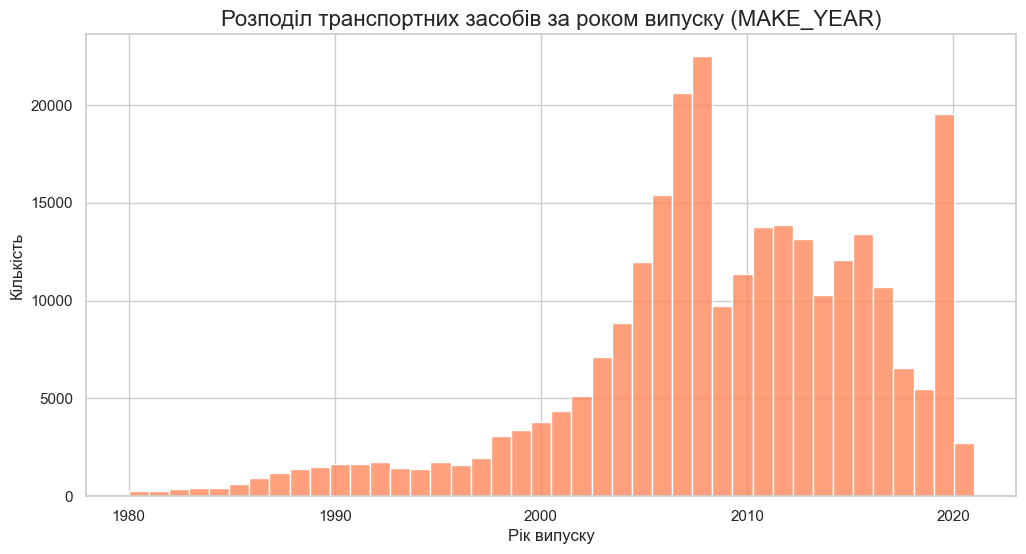

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['MAKE_YEAR'] >= 1980]['MAKE_YEAR'], bins=42, kde=False, color='coral')
plt.title('Розподіл транспортних засобів за роком випуску (MAKE_YEAR)', fontsize=16)
plt.xlabel('Рік випуску', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.show()

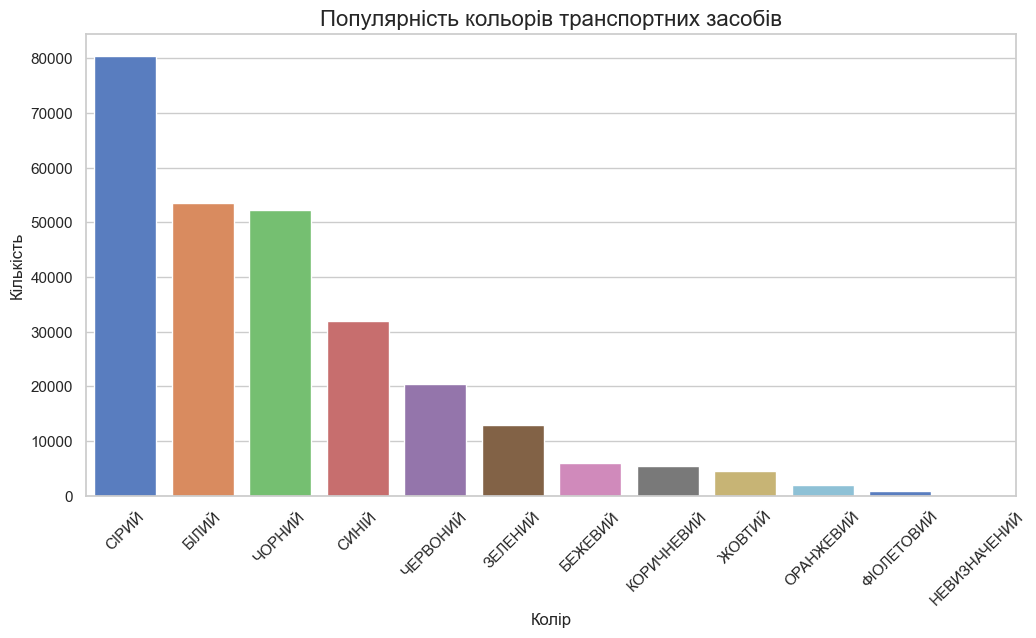

In [5]:
color_counts = df['COLOR'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette="muted")
plt.title('Популярність кольорів транспортних засобів', fontsize=16)
plt.xlabel('Колір', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.xticks(rotation=45) # Повертаємо підписи для кращої читабельності
plt.show()

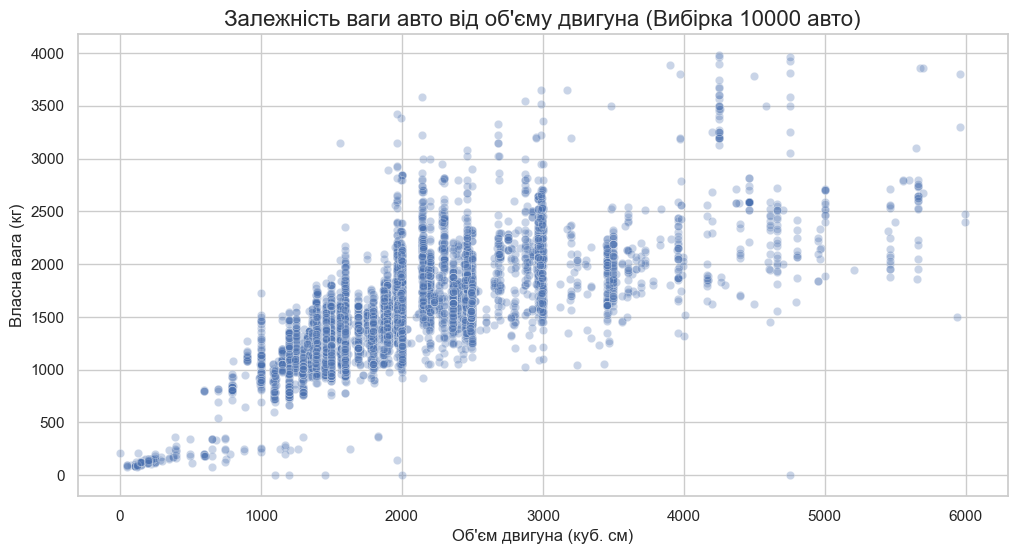

In [6]:
plot_df = df[['CAPACITY', 'OWN_WEIGHT']].dropna().copy()
plot_df['OWN_WEIGHT'] = pd.to_numeric(plot_df['OWN_WEIGHT'], errors='coerce')
plot_df = plot_df.dropna()

plot_df = plot_df[(plot_df['CAPACITY'] < 6000) & (plot_df['OWN_WEIGHT'] < 4000)]

sns.scatterplot(data=plot_df.sample(10000, random_state=1), x='CAPACITY', y='OWN_WEIGHT', alpha=0.3)
plt.title('Залежність ваги авто від об\'єму двигуна (Вибірка 10000 авто)', fontsize=16)
plt.xlabel('Об\'єм двигуна (куб. см)', fontsize=12)
plt.ylabel('Власна вага (кг)', fontsize=12)
plt.show()